In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1_AIbMO3LFQMCC8LppkH8j4EA1XF9jwve

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1_AIbMO3LFQMCC8LppkH8j4EA1XF9jwve
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 18.1MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
from sklearn.model_selection import train_test_split


X_gender = pd.get_dummies(df['Sex'])
X_BP = pd.get_dummies(df['BP'])
X_chol = pd.get_dummies(df['Cholesterol'])
X_other = df.drop(['Sex','Drug','BP','Cholesterol'],axis=1)
X = pd.concat([X_gender, X_other, X_BP, X_chol],axis=1).values
y = pd.get_dummies(df['Drug']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64, test_size=0.2, shuffle = True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
le_drug = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_sex = LabelEncoder()

df['Drug'] = le_drug.fit_transform(df['Drug'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Sex'] = le_sex.fit_transform(df['Sex'])

spl = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=64)
for train_index, test_index in spl.split(df[['Age','Sex','BP','Cholesterol','Na_to_K']], df['Drug']):
    x_train, x_test = df[['Age','Sex','BP','Cholesterol','Na_to_K']].iloc[train_index], df[['Age','Sex','BP','Cholesterol','Na_to_K']].iloc[test_index]
    y_train, y_test = df['Drug'].iloc[train_index], df['Drug'].iloc[test_index]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le_drug = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_sex = LabelEncoder()

df['Drug'] = le_drug.fit_transform(df['Drug'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Sex'] = le_sex.fit_transform(df['Sex'])


x_train, x_test, y_train, y_test = train_test_split(df[['Age','Sex','BP','Cholesterol','Na_to_K']], df['Drug'], test_size=0.2, random_state=64, shuffle=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(max_depth=3, random_state=64)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=64)

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         3
           3       0.79      1.00      0.88        11
           4       1.00      1.00      1.00        18

    accuracy                           0.93        40
   macro avg       0.76      0.80      0.78        40
weighted avg       0.87      0.93      0.89        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


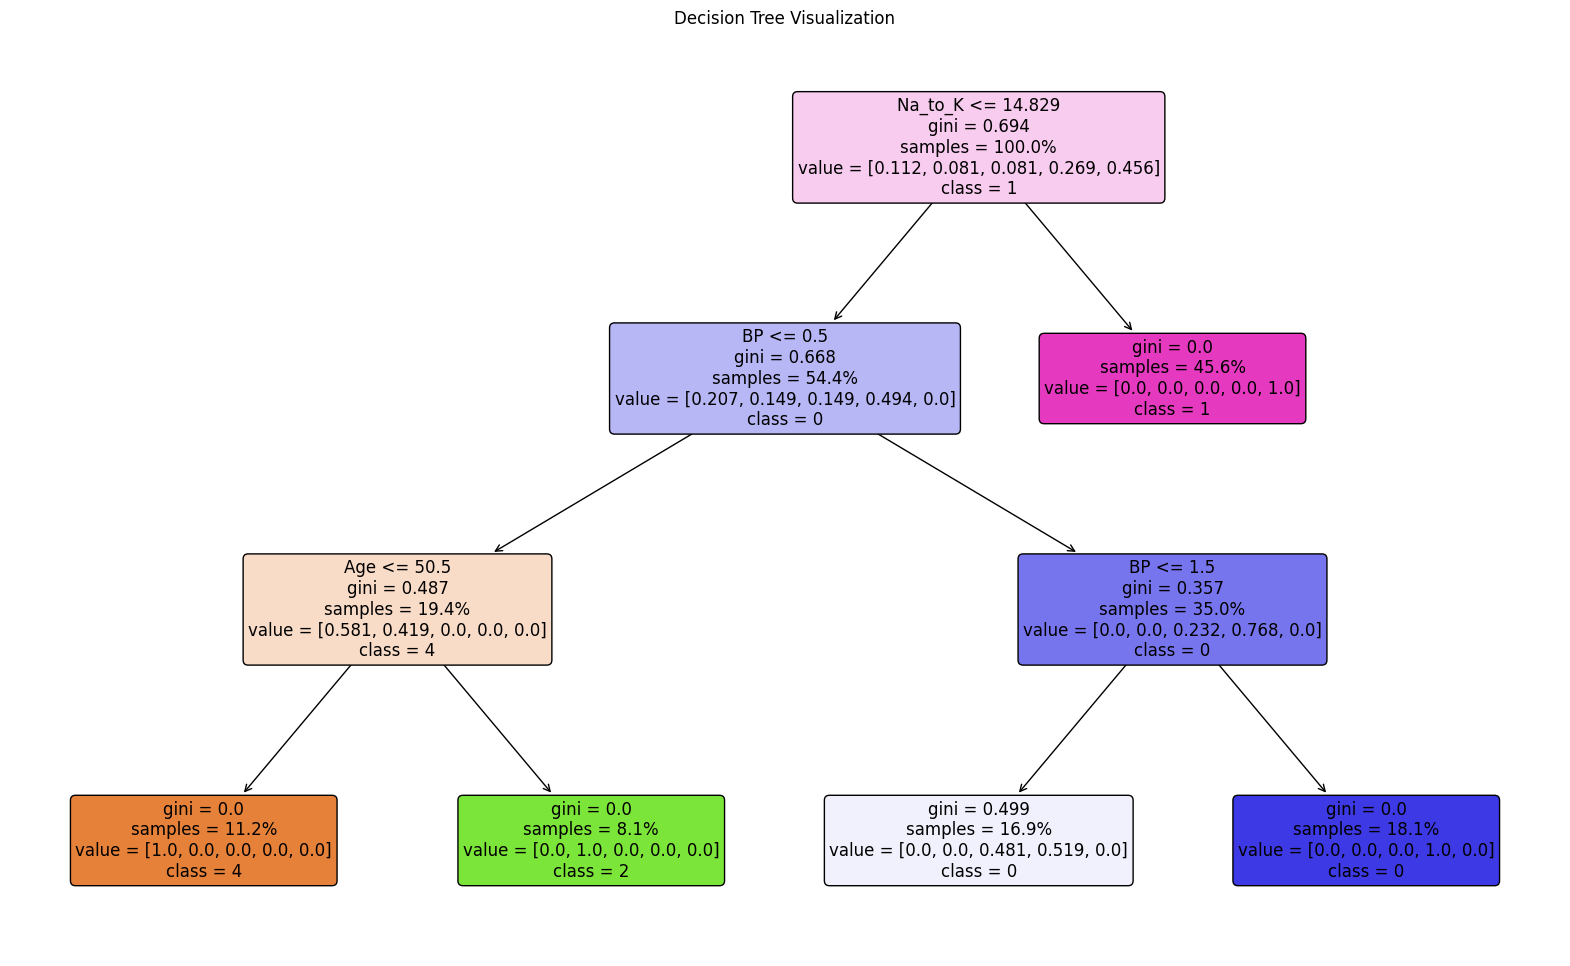

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
class_names = df['Drug'].unique().astype(str)

plot_tree(model,
          filled=True,
          rounded=True,
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
          class_names=class_names,
          proportion=True,
          fontsize=12)


plt.title('Decision Tree Visualization')
plt.show()


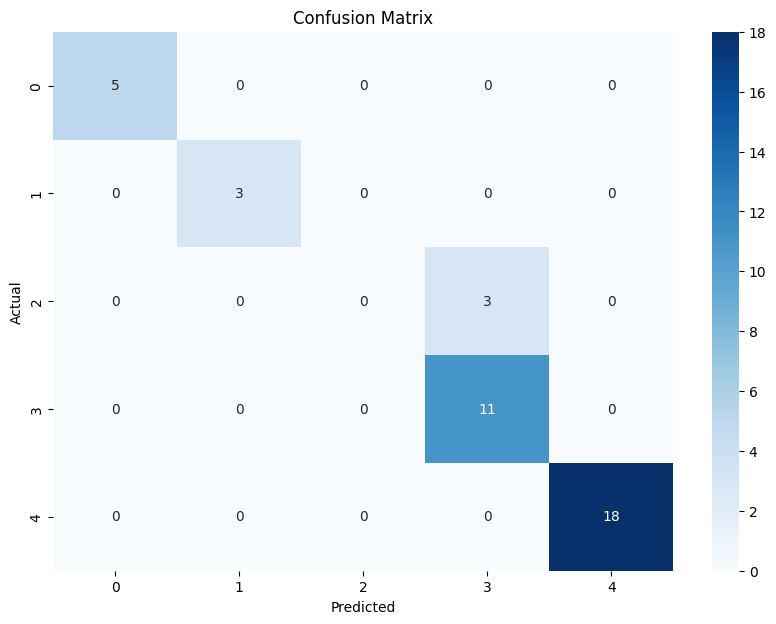

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
y_test_labels = le_drug.inverse_transform(y_test)
y_pred_labels = le_drug.inverse_transform(y_pred)

cm_labels = confusion_matrix(y_test_labels, y_pred_labels, labels=le_drug.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_labels, annot=True, fmt="d", cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model1 = DecisionTreeClassifier(max_depth=4, random_state=64)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=64)

In [ ]:
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



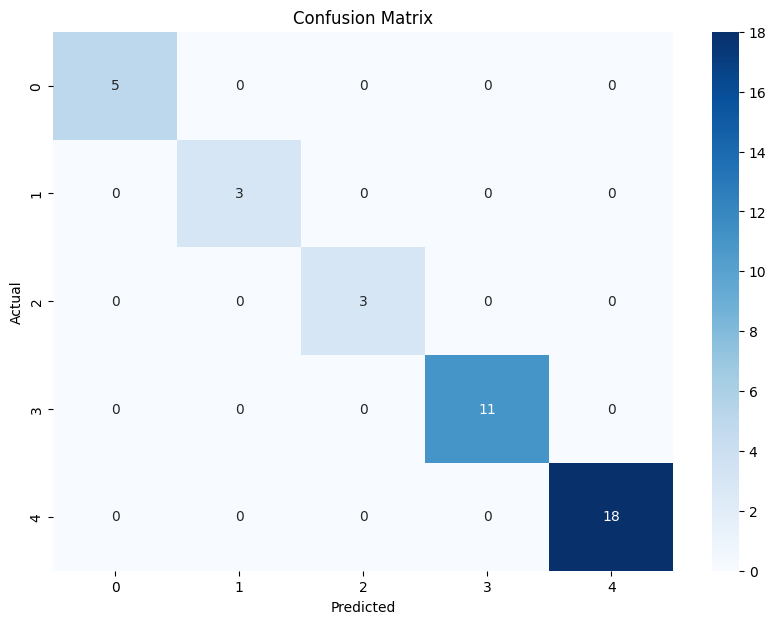

In [ ]:
cm = confusion_matrix(y_test, y_pred)
y_test_labels = le_drug.inverse_transform(y_test)
y_pred_labels = le_drug.inverse_transform(y_pred)

cm_labels = confusion_matrix(y_test_labels, y_pred_labels, labels=le_drug.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_labels, annot=True, fmt="d", cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

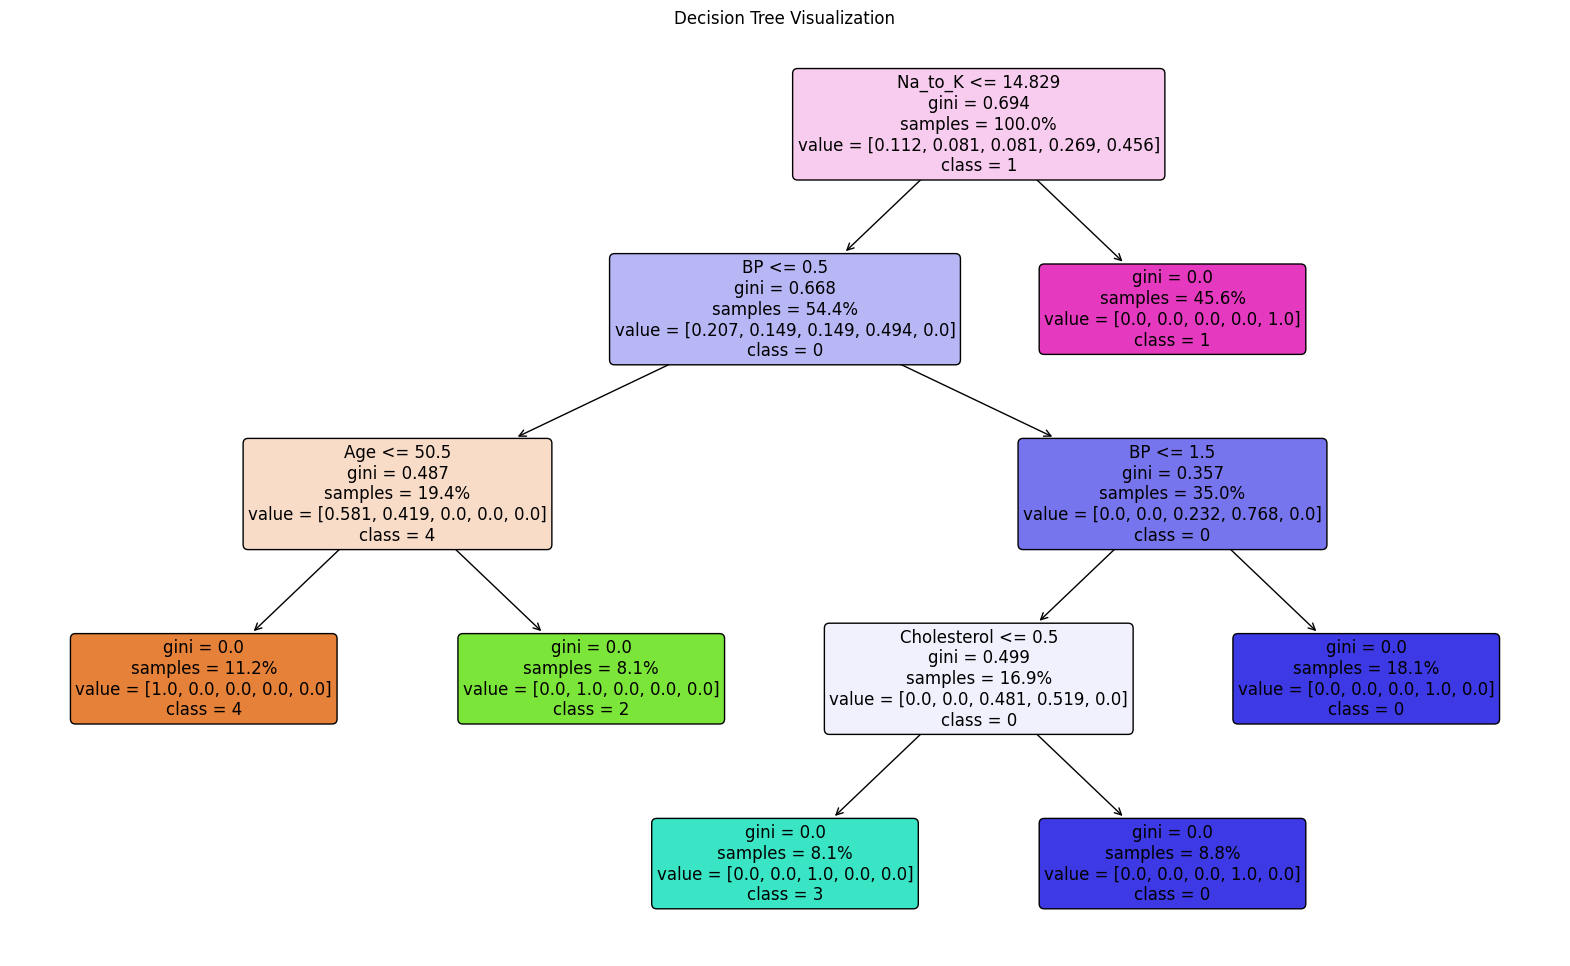

In [ ]:
plt.figure(figsize=(20, 12))
class_names = df['Drug'].unique().astype(str)

plot_tree(model1,
          filled=True,
          rounded=True,
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
          class_names=class_names,
          proportion=True,
          fontsize=12)


plt.title('Decision Tree Visualization')
plt.show()

# Q2-2

In [ ]:
model2 = DecisionTreeClassifier(max_depth=4,min_samples_split=20, max_features='sqrt',max_leaf_nodes=5, random_state=64)
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=5,
                       min_samples_split=20, random_state=64)

In [ ]:
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.20      0.33      0.25         3
           2       0.00      0.00      0.00         3
           3       0.47      0.73      0.57        11
           4       1.00      1.00      1.00        18

    accuracy                           0.68        40
   macro avg       0.33      0.41      0.36        40
weighted avg       0.59      0.68      0.63        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


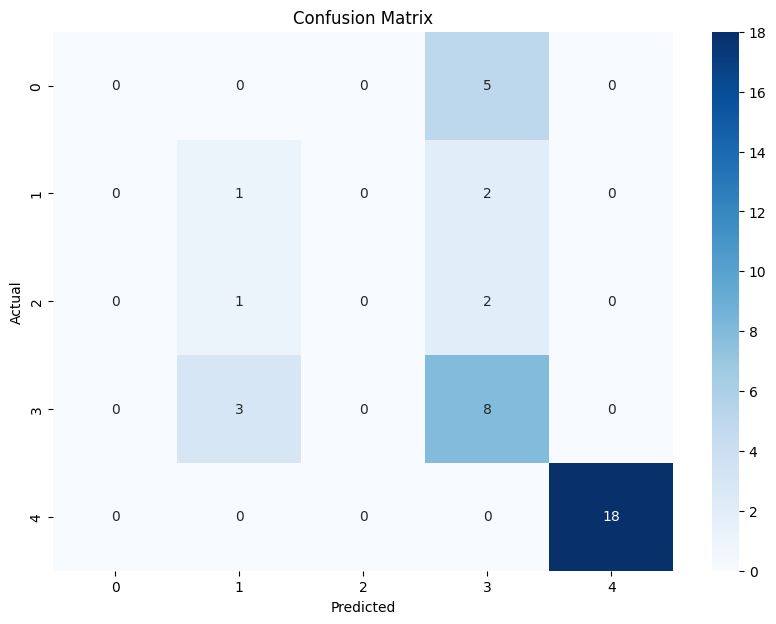

In [ ]:
cm = confusion_matrix(y_test, y_pred)
y_test_labels = le_drug.inverse_transform(y_test)
y_pred_labels = le_drug.inverse_transform(y_pred)

cm_labels = confusion_matrix(y_test_labels, y_pred_labels, labels=le_drug.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_labels, annot=True, fmt="d", cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

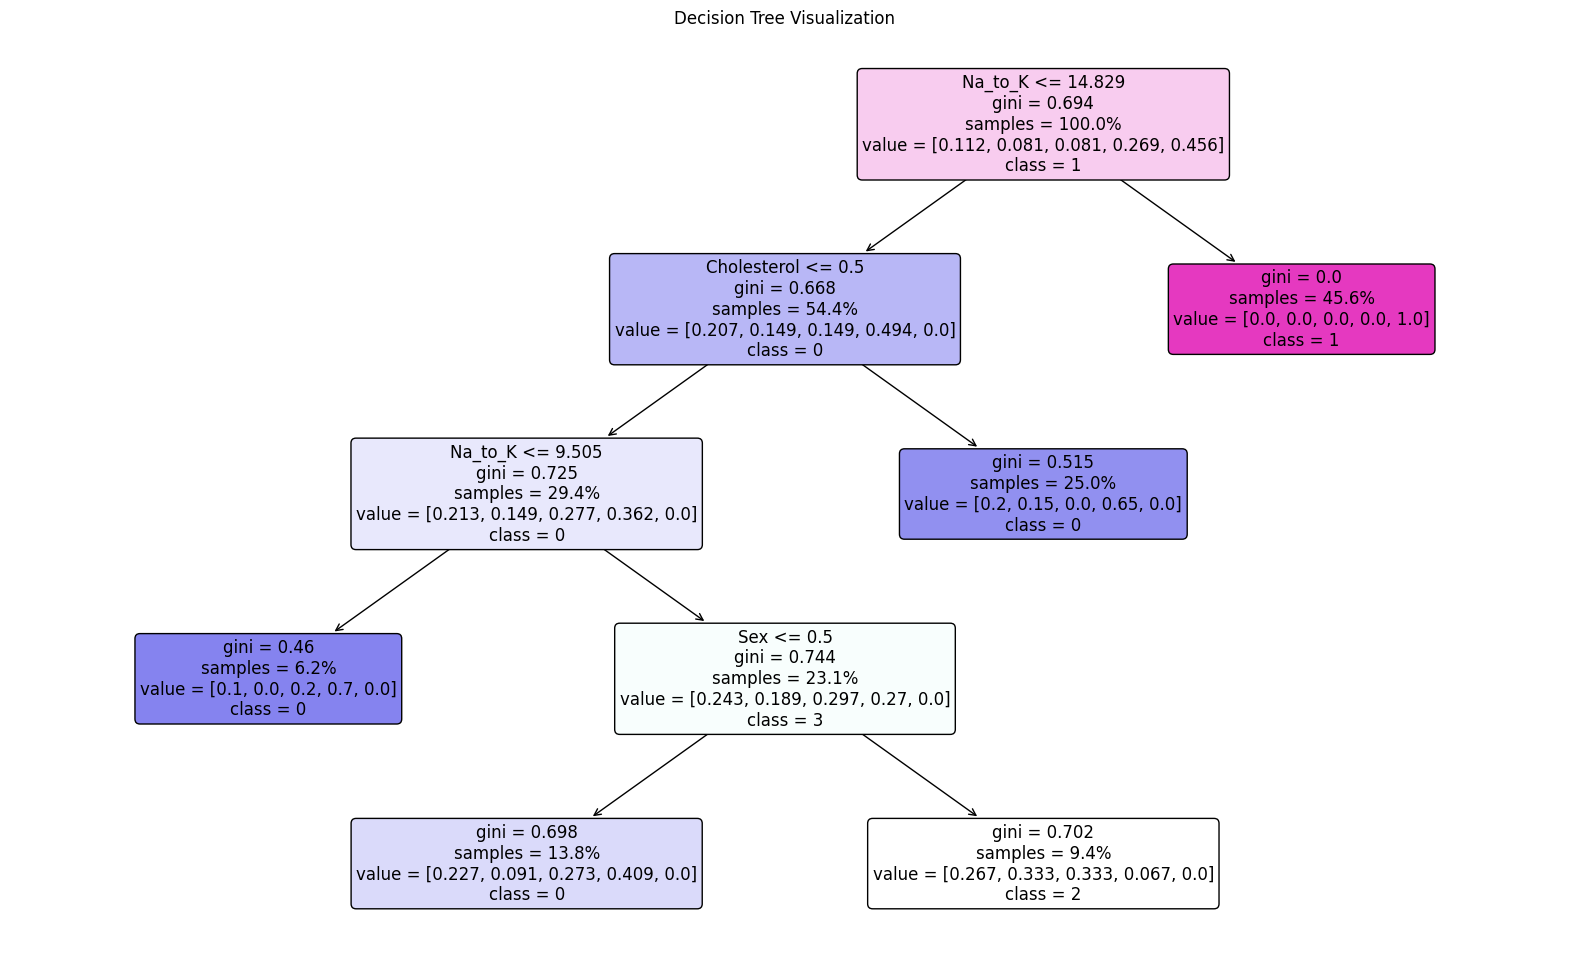

In [ ]:
plt.figure(figsize=(20, 12))
class_names = df['Drug'].unique().astype(str)

plot_tree(model2,
          filled=True,
          rounded=True,
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
          class_names=class_names,
          proportion=True,
          fontsize=12)


plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
model3 = DecisionTreeClassifier(max_depth=4,min_samples_split=5, max_features='sqrt',max_leaf_nodes=10, random_state=64)
model3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       min_samples_split=5, random_state=64)

In [ ]:
y_pred = model3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.775
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3
           2       0.50      0.67      0.57         3
           3       0.61      1.00      0.76        11
           4       1.00      1.00      1.00        18

    accuracy                           0.78        40
   macro avg       0.42      0.53      0.47        40
weighted avg       0.66      0.78      0.70        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


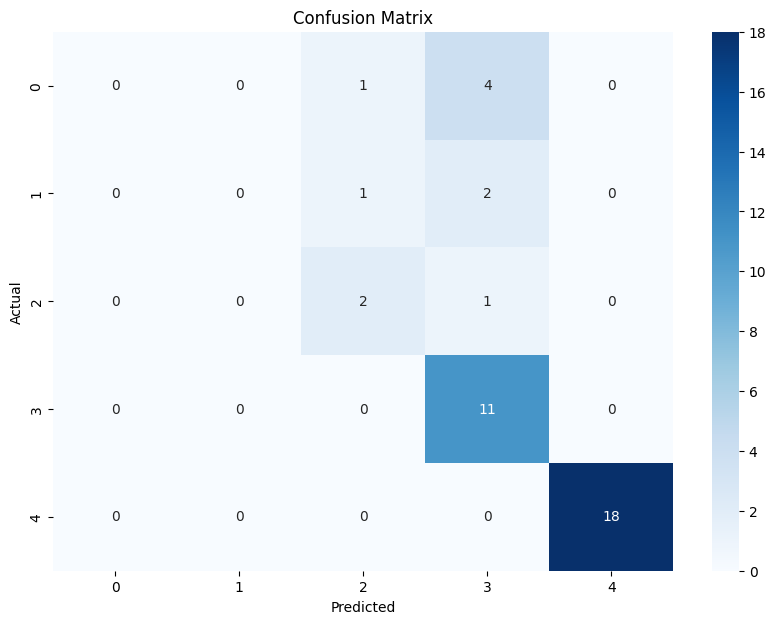

In [ ]:
cm = confusion_matrix(y_test, y_pred)
y_test_labels = le_drug.inverse_transform(y_test)
y_pred_labels = le_drug.inverse_transform(y_pred)

cm_labels = confusion_matrix(y_test_labels, y_pred_labels, labels=le_drug.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_labels, annot=True, fmt="d", cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

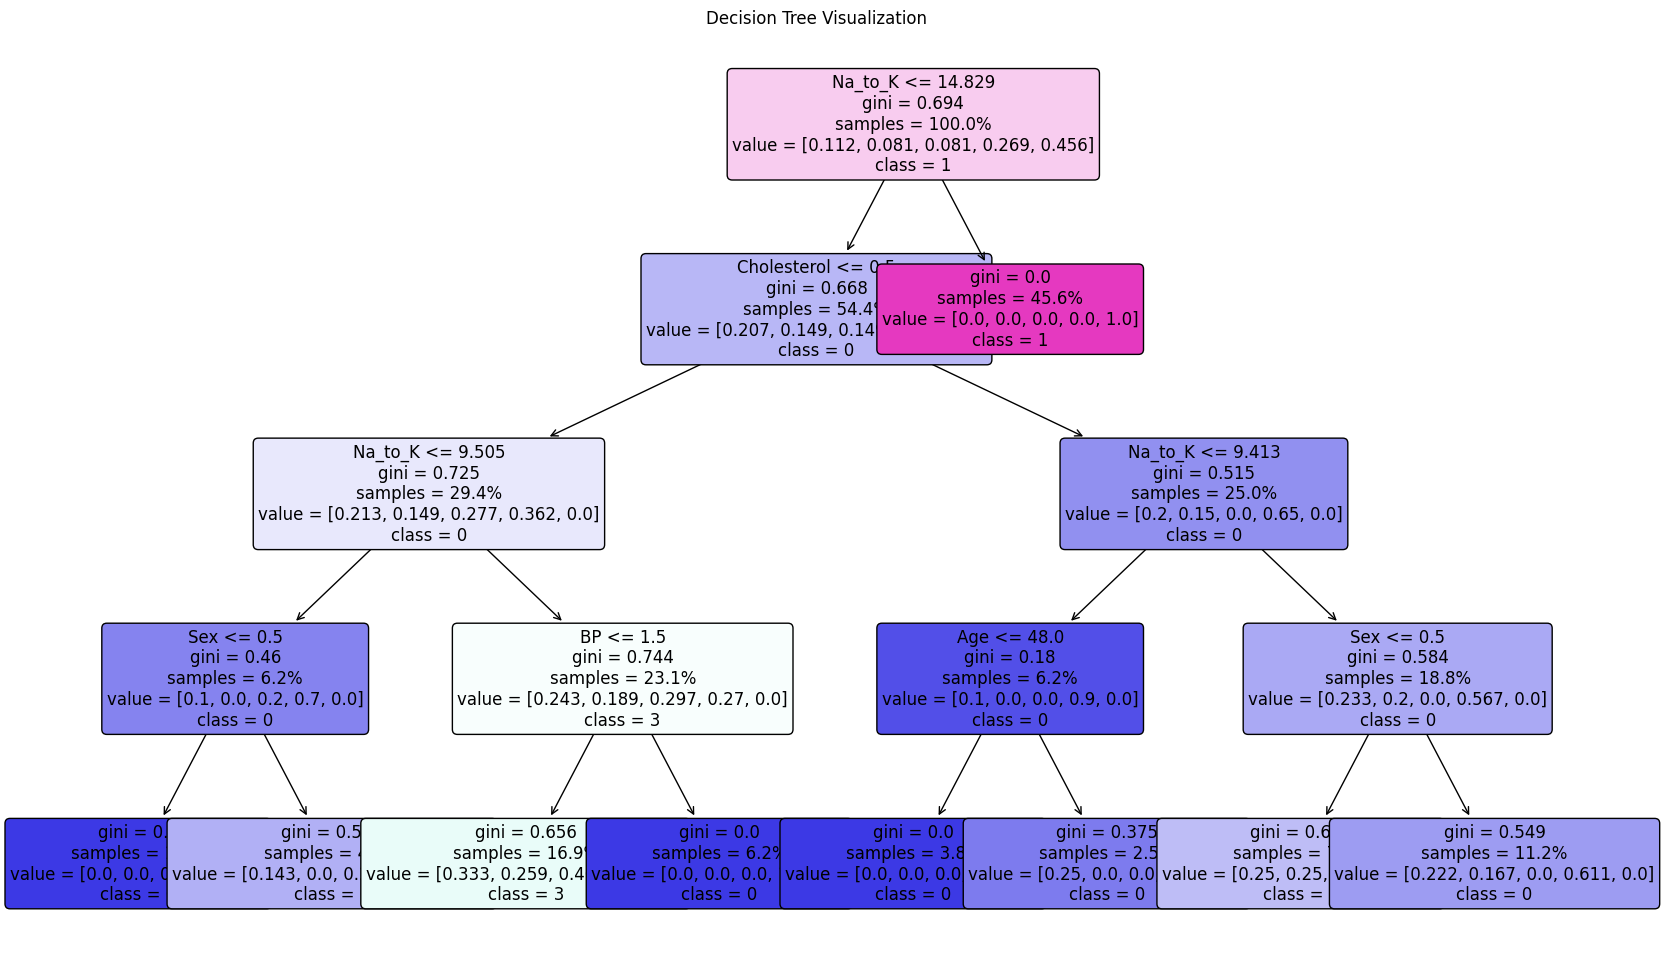

In [ ]:
plt.figure(figsize=(20, 12))
class_names = df['Drug'].unique().astype(str)

plot_tree(model3,
          filled=True,
          rounded=True,
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
          class_names=class_names,
          proportion=True,
          fontsize=12)


plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
model4 = DecisionTreeClassifier(max_depth=4,min_samples_split=5, max_features='sqrt',ccp_alpha=0.01, max_leaf_nodes=10, random_state=64)
model4.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4, max_features='sqrt',
                       max_leaf_nodes=10, min_samples_split=5, random_state=64)

In [ ]:
y_pred = model4.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.775
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3
           2       0.50      0.67      0.57         3
           3       0.61      1.00      0.76        11
           4       1.00      1.00      1.00        18

    accuracy                           0.78        40
   macro avg       0.42      0.53      0.47        40
weighted avg       0.66      0.78      0.70        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


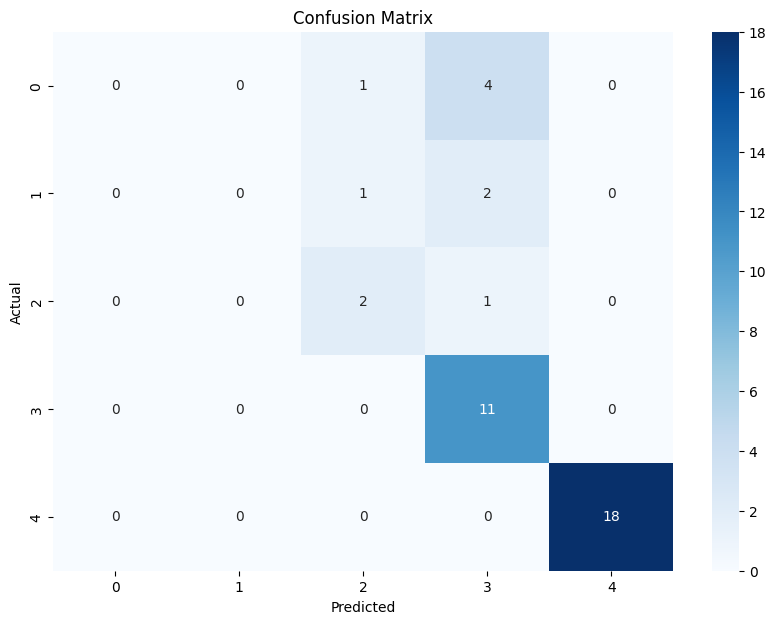

In [ ]:
cm = confusion_matrix(y_test, y_pred)
y_test_labels = le_drug.inverse_transform(y_test)
y_pred_labels = le_drug.inverse_transform(y_pred)

cm_labels = confusion_matrix(y_test_labels, y_pred_labels, labels=le_drug.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_labels, annot=True, fmt="d", cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

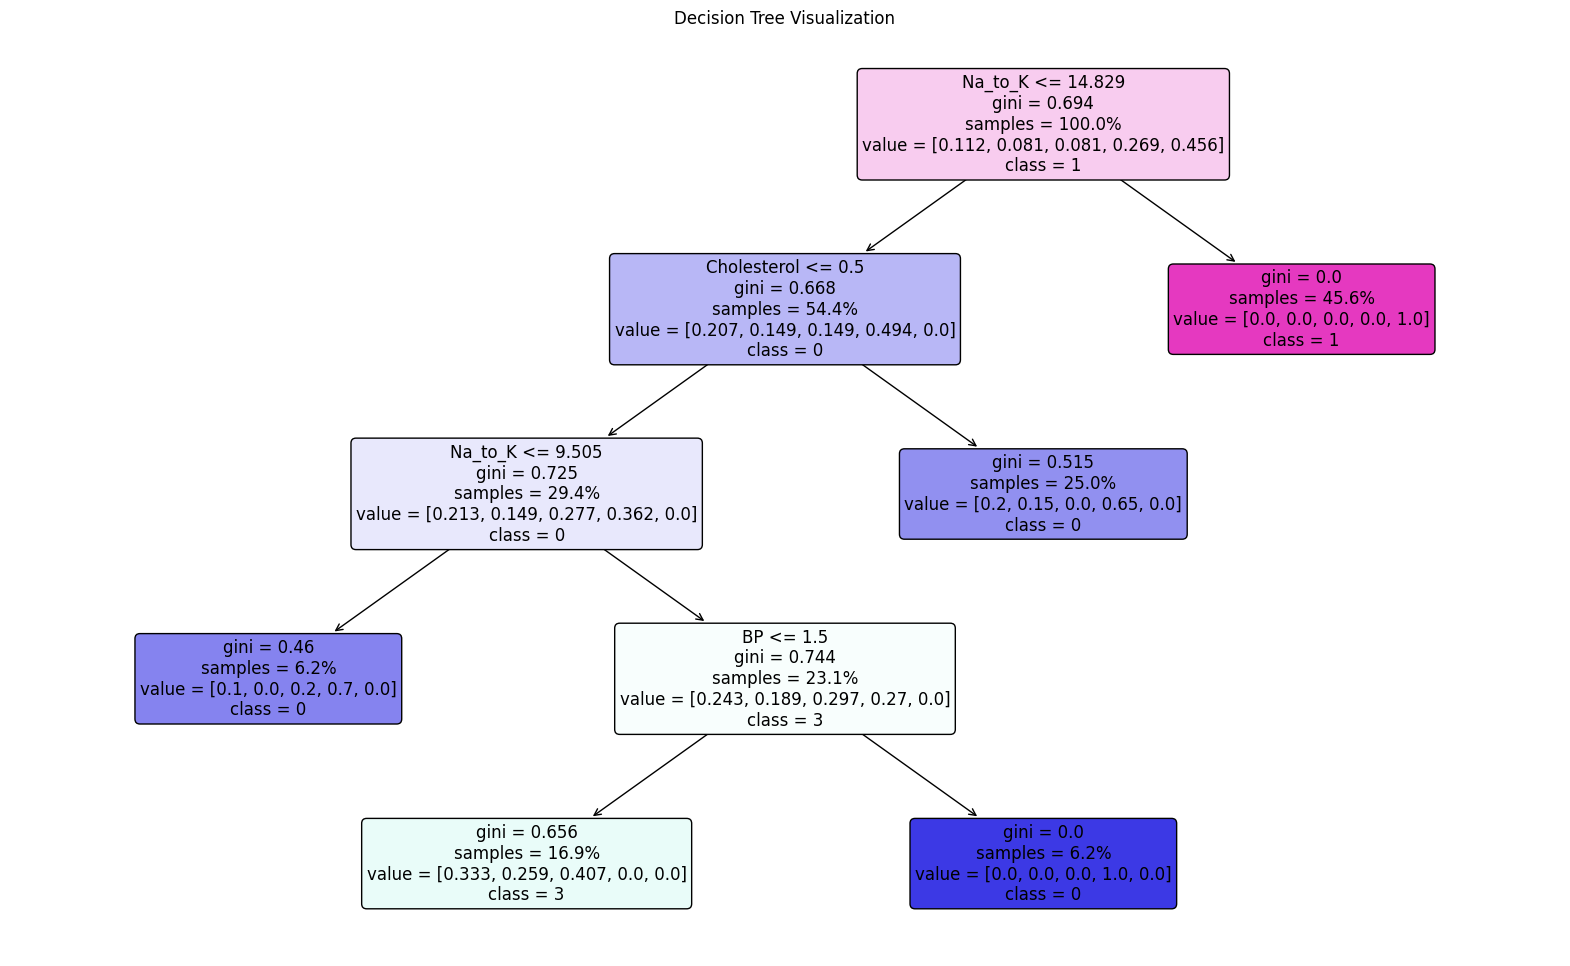

In [ ]:
plt.figure(figsize=(20, 12))
class_names = df['Drug'].unique().astype(str)

plot_tree(model4,
          filled=True,
          rounded=True,
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
          class_names=class_names,
          proportion=True,
          fontsize=12)


plt.title('Decision Tree Visualization')
plt.show()

# 2-3

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(n_estimators=3, min_samples_split=4, max_depth=10, random_state=64)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       0.60      1.00      0.75         3
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        18

    accuracy                           0.93        40
   macro avg       0.89      0.90      0.87        40
weighted avg       0.95      0.93      0.93        40



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

# Hyperparameters
n_estimators = [3, 5, 10, 30, 100]
learning_rates = [0.1, 0.05, 0.01]

f1_scorer = make_scorer(f1_score, average='weighted')

weak_learner = RandomForestClassifier(random_state=64)

results = []

for ne in n_estimators:
    for lr in learning_rates:
        model = AdaBoostClassifier(estimator=weak_learner, n_estimators=ne, learning_rate=lr)

        # Cross-validation
        scores = cross_val_score(model, x_train, y_train, cv=3, scoring=f1_scorer)
        mean_f1_score = np.mean(scores)

        # Append results
        results.append({
            'n_estimators': ne,
            'learning_rate': lr,
            'mean_f1_score': mean_f1_score,
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print(results_df)


    n_estimators  learning_rate  mean_f1_score
0              3           0.10       0.973911
1              3           0.05       0.980137
2              3           0.01       0.980137
3              5           0.10       0.967558
4              5           0.05       0.980137
5              5           0.01       0.987282
6             10           0.10       0.981056
7             10           0.05       0.987282
8             10           0.01       0.973911
9             30           0.10       0.973515
10            30           0.05       0.973911
11            30           0.01       0.973911
12           100           0.10       0.973911
13           100           0.05       0.980137
14           100           0.01       0.973911
